In [805]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import gradio as gr

# SciPy and statistics
from scipy import stats
from scipy.stats import kurtosis, skew

# Outlier handling
from outlier_cleaner import OutlierCleaner

# Scikit-learn preprocessing
from sklearn.preprocessing import (
    MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
)
from sklearn.compose import ColumnTransformer

# Model selection and evaluation
from sklearn.model_selection import (
    train_test_split, GridSearchCV, KFold, cross_val_score
)
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

# Regression models
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, LogisticRegression
)
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor,
    AdaBoostRegressor, VotingRegressor, StackingRegressor
)

# Model evaluation metrics
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error,
    accuracy_score, classification_report, confusion_matrix,
    precision_score, roc_curve, roc_auc_score
)

# Extended evaluation (custom module)
from extended_sklearn_metrics import evaluate_model_with_cross_validation

# Extra model
import xgboost as xgb

In [869]:
path = "Salary_Dataset_with_Extra_Features.csv"
df = pd.read_csv(path)

In [871]:
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [873]:
df.dropna(inplace=True)

In [875]:
mapped = {
    'Android Developer': 'Android Developer',
    'Android Software Engineer': 'Android Developer',
    'Software Engineer Android': 'Android Developer',
    'Android Software Developer': 'Android Developer',
    'Android Applications Developer': 'Android Developer',
    'Android App Developer': 'Android Developer',
    'Android Engineer': 'Android Developer',
    'Sr. Android Developer': 'Senior Android Developer',
    'Android': 'Android Developer',
    'Associate Android Developer': 'Android Developer',
    'Android Developer and Team Lead': 'Android Team Lead',
    'Sr Android developer': 'Senior Android Developer',
    'Android Trainee': 'Android Developer',
    'Android Development': 'Android Developer',
    'Android Team': 'Android Developer',
    ', Android Developer': 'Android Developer',
    'Android Tech': 'Android Developer',
    'Tech Android Applications Developer': 'Android Developer',
    'Full Stack Android Developer': 'Full Stack Android Developer',
    'Android Framework Developer': 'Android Framework Developer',
    'Android Architect': 'Android Architect',
    'Android &amp; Flutter Developer': 'Mobile Developer (Android/Flutter)',
    'Software Engineer, Android': 'Android Developer',
    'Android App Development': 'Android Developer',
    'Sr Android Engineer': 'Senior Android Developer',
    'Android Technical': 'Android Developer',
    'SDE2(Android)': 'Android Developer',
    'Web Developer/Android Developer': 'Mobile Developer (Android/Web)',
    'Android Applications Develpoers': 'Android Developer',
    'Android Platform Developer': 'Android Platform Developer',
    'Android Test Engineer': 'Android Test Engineer',
    'Engineer Android': 'Android Developer',
    'Android Framework Engineer': 'Android Framework Engineer',
    'Game Developer ( Android, Windows)': 'Game Developer',
    'Android Testing': 'Android Test Engineer',
    'Software Engineer (Android/Mobility)': 'Mobile Developer (Android)',
    'Ace Android Development': 'Android Developer',
    'Software Developer (Android)': 'Android Developer',
    'Android Mobile Developer': 'Android Developer',
    'Android and Flutter Developer': 'Mobile Developer (Android/Flutter)',
    'Flutter/Android Developer': 'Mobile Developer (Android/Flutter)',
    'Freelance Android Mobile Developer': 'Android Developer (Freelance)',
    'Android Ionic Developer': 'Mobile Developer (Android/Ionic)',
    'Software Engineer(Android)': 'Android Developer',
    'Android Developer/Software Engineer': 'Android Developer',
    'Android Programmer': 'Android Developer',
    'Associate Android Engineer': 'Android Developer',
    'Software Developer Android Developer': 'Android Developer',
    'Software Engineer (Android Developer)': 'Android Developer',

    'Backend Developer': 'Backend Developer',
    'Software Engineer Backend': 'Backend Developer',
    'Backend Software Engineer': 'Backend Developer',
    'Software Developer (Backend)': 'Backend Developer',
    'Software Engineer (Backend)': 'Backend Developer',
    'Backend Software Developer': 'Backend Developer',
    'Software Developer (Backend Engineer)': 'Backend Developer',
    'Backend Engineer': 'Backend Developer',
    'Backend Web Developer': 'Backend Web Developer',
    'Python Backend Developer': 'Backend Python Developer',
    'NodeJS Backend Developer': 'Backend NodeJS Developer',
    'Sr Backend Software Engineer': 'Senior Backend Developer',
    'Backend Java Developer': 'Backend Java Developer',
    'Backend': 'Backend Developer',
    'Java Backend Developer ()': 'Backend Java Developer',
    'Backend Process': 'Backend Operations',
    'SDE 2 Backend': 'Backend Developer',
    'Backend Operations': 'Backend Operations',
    'Magento II Backend Developer': 'Backend Magento Developer',
    'Backend Engineering': 'Backend Developer',
    'Backend Support Executive': 'Backend Support',
    'Backend Operation': 'Backend Operations',
    'Jr Backend Developer': 'Junior Backend Developer',
    'Backend Executive': 'Backend Operations',
    'Backend Developer, NodeJs': 'Backend NodeJS Developer',
    'Developer BackEnd': 'Backend Developer',
    'Java Backend Web Developer': 'Backend Java Web Developer',
    'Backend Support': 'Backend Support',
    'Node Js Backend Developer': 'Backend NodeJS Developer',
    'Backend Associate': 'Backend Developer',
    'Operations Backend': 'Backend Operations',
    'Chargeback Backend': 'Backend Operations',
    'Assistant Backend': 'Backend Support',
    'Software Backend Developer': 'Backend Developer',
    'Software Developer (Backend Node Js)': 'Backend NodeJS Developer',
    'Backend Executive & Supporting Staff': 'Backend Operations',

    'Database Engineer': 'Database Engineer',
    'Database Administrator': 'Database Administrator',
    'Database Developer': 'Database Developer',
    'Oracle Database Administrator': 'Oracle Database Administrator',
    'Database Administrator (Database Administrator)': 'Database Administrator',
    'Database Administrator (DBA)': 'Database Administrator',
    'SQL Server Database Administrator': 'SQL Server Database Administrator',
    'SQL Database Administrator': 'SQL Server Database Administrator',
    'Database Analyst': 'Database Analyst',
    'Oracle Applications Database Administrator': 'Oracle Applications DBA',
    'Database Administrator/Developer': 'Database Administrator/Developer',
    'Database Administrator II': 'Database Administrator',
    'Oracle DBA': 'Oracle Database Administrator',
    'Database': 'Database Professional',
    'DB2 Database Administrator': 'DB2 Database Administrator',
    'DBA': 'Database Administrator',
    'SQL DBA': 'SQL Server Database Administrator',
    'Database Administrator (DBA) Oracle': 'Oracle Database Administrator',
    'Database Architect': 'Database Architect',
    'Mysql Database Administrator': 'MySQL Database Administrator',
    'SQL Database Developer': 'SQL Database Developer',
    'Database Software Engineer': 'Database Engineer',
    'Database Specialist': 'Database Specialist',
    'Oracle Database Developer': 'Oracle Database Developer',
    'Sr Database Administrator': 'Senior Database Administrator',
    'Applications Database Administrator': 'Applications Database Administrator',
    'Database Programmer': 'Database Developer',
    'Database Administrator (Database Administrator) Oracle': 'Oracle Database Administrator',
    'Database Administrator Associate': 'Associate Database Administrator',
    'Oracle Database Administrator/Developer': 'Oracle Database Administrator/Developer',
    'Sr. Database Engineer': 'Senior Database Engineer',
    'Database Consultant': 'Database Consultant',
    'SQL Server DBA': 'SQL Server Database Administrator',
    'Associate Database Administrator': 'Associate Database Administrator',
    'Advanced Database Administrator': 'Advanced Database Administrator',
    'Database Administrators': 'Database Administrator',
    'Oracle Applications Database Administrator (Database Administrator)': 'Oracle Applications DBA',
    'Mssql Database Administrator': 'SQL Server Database Administrator',
    'Sybase Database Administrator': 'Sybase Database Administrator',
    'Cloud Database Engineer': 'Cloud Database Engineer',
    'DB Administrator': 'Database Administrator',
    'PostgreSQL Database Administrator': 'PostgreSQL Database Administrator',
    'Database Administrative': 'Database Administrator',
    'Associate Database Engineer': 'Associate Database Engineer',
    'Ms SQL Server Database Administrator': 'SQL Server Database Administrator',
    'Peoplesoft Database Administrator': 'Peoplesoft Database Administrator',
    'Database Administrator Developer': 'Database Administrator/Developer',
    'Team DBA': 'Database Administrator',
    'Database Administrator Consultant': 'Database Consultant',
    '"ORACLE DBA"': 'Oracle Database Administrator',
    'Sr. Database Administrator': 'Senior Database Administrator',
    'MongoDB Database Administrator': 'MongoDB Database Administrator',
    'Database Administration': 'Database Administrator',
    'SAP Database Administrator': 'SAP Database Administrator',
    'Postgresql Database Administrator': 'PostgreSQL Database Administrator',
    'Database Administrator Advisor': 'Database Administrator',
    'Database Administrator Specialist': 'Database Specialist',
    'Software Engineer Database': 'Database Engineer',
    'Database Designer': 'Database Designer',
    'Production Database Administrator': 'Production Database Administrator',
    'Associate Oracle Database Administrator': 'Associate Oracle Database Administrator',
    'Microsoft SQL Server Database Administrator': 'SQL Server Database Administrator',
    'Database Architect/Developer': 'Database Architect/Developer',
    'Mainframe DB2 Database Administrator': 'Mainframe DB2 DBA',
    'MS SQL DB Administrator': 'SQL Server Database Administrator',

    'Front End Developer': 'Front End Developer',
    'Software Engineer Front End': 'Front End Developer',
    'Software Engineer (Front end Developer)': 'Front End Developer',
    'Front End Web Developer': 'Front End Web Developer',
    'Front End Cashier': 'Front End (Non-Technical)',
    'Front End Engineer': 'Front End Developer',
    'Front End Associate': 'Front End (Non-Technical)',
    'Front End': 'Front End (General)',
    'Front End UI Developer': 'Front End UI Developer',
    'Front end Developer': 'Front End Developer',
    'Sr. Front End Developer': 'Senior Front End Developer',
    'Csa Front End': 'Front End (Non-Technical)',
    'Associate Front End Developer': 'Front End Developer',
    'Front End React Developer': 'Front End React Developer',
    'Front End Web Developer/Designer': 'Front End Web Developer',
    'Front End Designer': 'Front End Designer',
    'Angular Front End Developer': 'Front End Angular Developer',
    'Front End Developer (React JS)': 'Front End React Developer',
    'Front End Architect': 'Front End Architect',
    'React Front End Developer': 'Front End React Developer',
    'Sr Front End Engineer': 'Senior Front End Developer',
    'Front End Engineering': 'Front End Developer',
    'Front End Web Deceloper': 'Front End Web Developer',
    'Front End Developer (Angular)': 'Front End Angular Developer',
    'UI/User Experience Designer & Front End Developer': 'Front End Developer (UI/UX Focus)',
    'Software Engineer Front End Developer': 'Front End Developer',
    'UI Developer/Front End Developer': 'Front End UI Developer',
    'UI/Front End Developer': 'Front End UI Developer',
    'Front End Developer and Designer': 'Front End Developer (Design Focus)',
    'UI/UX Designer & Front End Developer': 'Front End Developer (UI/UX Focus)',
    'Developer Front End': 'Front End Developer',
    'Front End Eveloper': 'Front End Developer',
    'Engineer Front End CAD': 'Front End Developer',
    'Front End Service Clerk/Cashier': 'Front End (Non-Technical)',
    'Front End Web Development': 'Front End Web Development',
    'React Js Front End Developer': 'Front End React Developer',
    'Fresher Front End': 'Front End Developer',
    'Front End Developer Javascript/HTML5': 'Front End Developer',
    'Front End Engineer III': 'Senior Front End Developer',
    'Front end Web Developer (Software Engineer)': 'Front End Web Developer',
    'Front End Assistant': 'Front End (Non-Technical)',
    'Web Developer (Front end)': 'Front End Web Developer',
    'Front End Dev': 'Front End Developer',
    'UI Front End Developer': 'Front End UI Developer',
    'Front End Chasier': 'Front End (Non-Technical)',
    'Associate Front End Engineer': 'Front End Developer',
    'AEM Front End Developer': 'Front End AEM Developer',
    'Full Stack Front End Developer': 'Full Stack Front End Developer',
    'Front End Web Deveoloper': 'Front End Web Developer',
    'Java Developer and Front End Developer': 'Full Stack Java/Front End Developer',
    'Front End Software Engineer': 'Front End Developer',
    'Front end Web Developer': 'Front End Web Developer',
    'Front End Team Leader': 'Front End Team Lead',
    'Front End Development': 'Front End Developer',
    'ReactJS/Redux Front End Developer': 'Front End React Developer',
    'Front End Developer Angular': 'Front End Angular Developer',
    'Professional Front End Developer': 'Front End Developer',
    'Front End Development Analyst': 'Front End Analyst',
    'Front End Chief Angular Architect': 'Front End Architect',
    'Front End Developer, UI Designer, UI Developer, User Experience Designer, HTML5 Developer': 'Front End Developer (UI/UX Focus)',

    'iOS Developer': 'iOS Developer',
    'iOS Software Developer': 'iOS Developer',
    'iOS Software Engineer': 'iOS Developer',
    'Software Engineer (iOS Developer)': 'iOS Developer',
    'Software Engineer iOS': 'iOS Developer',
    'iOS Developeer': 'iOS Developer',
    'iOS Applications Developer': 'iOS Developer',
    'Middle iOS Developer': 'iOS Developer',
    'iOS Engineer': 'iOS Developer',
    'Sr iOS Developer': 'Senior iOS Developer',
    'iOS Developee': 'iOS Developer',
    'iOS Developers': 'iOS Developer',
    'Software Developer (iOS Developer)': 'iOS Developer',
    'Software Engineer(iOS Developer)': 'iOS Developer',
    'iOS App Developer': 'iOS Developer',
    'iOS Mobile Developer': 'iOS Developer',
    'iOS Development': 'iOS Developer',
    'Ios': 'iOS Developer',
    'Jr. iOS Developer': 'Junior iOS Developer',
    'Sr. iOS Developer': 'Senior iOS Developer',
    'Associate iOS Developer': 'iOS Developer',
    'IOS App Developer': 'iOS Developer',
    'iOS Team': 'iOS Developer',
    'SR. IOS Applications DEVELOPER': 'Senior iOS Developer',
    'IOS': 'iOS Developer',
    'Sr. IOS Engineer': 'Senior iOS Developer',
    'Software Engineer IOS Developer': 'iOS Developer',
    'iOS Developer Trainee': 'iOS Developer',
    'iOS Developer L2': 'iOS Developer',
    'iOS & Android Developer': 'Mobile Developer (Android/iOS)',
    'Sen Ios Developer': 'Senior iOS Developer',
    'Team IOS': 'iOS Developer',
    'Tech IOS': 'iOS Developer',
    'Product Developer(IOS)': 'iOS Developer',
    'IOS App Review WWDR': 'iOS Developer',
    'IOS Applications Developer 2': 'iOS Developer',
    'Mobile Developer Solution IOS Developer': 'iOS Developer',
    'Apple Ios Development': 'iOS Developer',
    'IOS Architect': 'iOS Architect',
    'Total Exp: IV III In IOS': 'iOS Developer',
    ', IOS Team': 'iOS Developer',
    'Software Engineer (IOS)': 'iOS Developer',
    'Android/IOS Developer': 'Mobile Developer (Android/iOS)',
    'Mobile Developer (IOS)': 'iOS Developer',
    'IOS Dev': 'iOS Developer',
    'Jr iOS developer': 'Junior iOS Developer',
    'Software Engineer III IOS': 'Senior iOS Developer',
    'IOS Developer and Tech Lead': 'iOS Team Lead',
    'Associate Developer IOS': 'iOS Developer',
    'Analyst (IOS/IPhone)': 'iOS Analyst',

    'Java Developer': 'Java Developer',
    'Java Software Engineer': 'Java Developer',
    'Java Software Developer': 'Java Developer',
    'Software Engineer Java Developer': 'Java Developer',
    'Software Engineer Java': 'Java Developer',
    'Software Developer (Java Developer)': 'Java Developer',
    'Software Engineer (Java Developer)': 'Java Developer',
    'Java Developeer': 'Java Developer',
    'Java Developing': 'Java Developer',
    'Full Stack Java Developer': 'Full Stack Java Developer',
    'Java Developer/Full Stack': 'Full Stack Java Developer',
    'Java Tech Developer': 'Java Developer',
    'Java Engineer': 'Java Developer',
    'Java App Developer': 'Java Developer',
    'Java App Development': 'Java Developer',
    'Java Web Developer': 'Java Web Developer',
    'Sr Java Developer': 'Senior Java Developer',
    'Java Programmer': 'Java Developer',
    'J2EE Developer': 'Java Developer',
    'Java Development': 'Java Developer',
    'Sr. Java Engineer': 'Senior Java Developer',
    'Java Application Developer': 'Java Developer',
    'Java Developer (Freelance)': 'Java Developer (Freelance)',
    'Java Script Developer': 'JavaScript Developer',
    'Java Developer Senior': 'Senior Java Developer',
    'Java Dev': 'Java Developer',
    'J2EE Software Developer': 'Java Developer',
    'Java Team Lead': 'Java Team Lead',
    'Java Developer - Backend': 'Backend Java Developer',
    'Full Stack Developer - Java': 'Full Stack Java Developer',
    'Java Developer (backend)': 'Backend Java Developer',
    'Senior Java Developer': 'Senior Java Developer',
    'J2EE Developer (Java)': 'Java Developer',
    'Java Developer Consultant': 'Java Developer Consultant',
    'JavaScript Java Developer': 'JavaScript Developer (Java)',
    'Java Full Stack Developer': 'Full Stack Java Developer',
    'Fullstack Developer (Java)': 'Full Stack Java Developer',
    'Java Web Development': 'Java Web Developer',
    'Java Backend Developer': 'Backend Java Developer',
    'Java Spring Developer': 'Java Spring Developer',
    'Java Microservices Developer': 'Java Microservices Developer',
    'Java/JEE Developer': 'Java Developer',
    'Senior Java Development Engineer': 'Senior Java Developer',
    'Java (Spring) Developer': 'Java Spring Developer',
    'Software Developer Java': 'Java Developer',
    'Sr Java Developer (Backend)': 'Senior Java Backend Developer',
    'Java Senior Developer': 'Senior Java Developer',
    'J2EE Software Engineer': 'Java Developer',
    'Java Developer (Freelancer)': 'Java Developer (Freelance)',
    'Junior Java Developer': 'Junior Java Developer',
    'Java Developer Backend': 'Backend Java Developer',
    'Software Developer Java Spring': 'Java Spring Developer',
    'Java Consultant': 'Java Developer Consultant',
    'Java J2EE Developer': 'Java Developer',
    'Java 9+ Developer': 'Java Developer',
    'Java Development Engineer': 'Java Developer',
    'Java Developer (Backend) Python': 'Backend Java Developer',
    'Java Developer Android': 'Mobile Developer (Android/Java)',
    'Java Developer/Web Developer': 'Full Stack Developer',
    'Java Technical Lead': 'Java Team Lead',
}

df['job_roles'] = df['Job Title'].apply(lambda x: x if x in mapped else 'Other')

In [877]:
df['job_roles'].nunique()

200

In [879]:
df['Location'] = df['Location'].map({
    'New Delhi': 'North',
    'Jaipur': 'North',
    'Madhya Pradesh': 'North',
    'Kolkata': 'North',
    'Bangalore': 'South',
    'Chennai': 'South',
    'Hyderabad': 'South',
    'Kerala': 'South',
    'Mumbai': 'South',
    'Pune': 'South'
})

In [881]:
job_categories = ["Developer", "Engineer", "Programmer"]
conditions = [
    (df["Job Title"].str.contains("Developer")),
    (df["Job Title"].str.contains("Engineer")),
    df["Job Title"].str.contains("Programmer")
]
df["job_category"] = np.select(conditions, job_categories, default="Other")
df[["Job Title", "job_category"]].head()

df.drop("Job Title", axis=1, inplace=True)
df.drop("Salaries Reported", axis=1, inplace=True)

In [883]:
np.random.seed(42)
sample_salaries = np.concatenate([
    np.random.randint(8448, 300000, size=5000), # Low range
    np.random.randint(300000, 888000, size=10000), # Medium range
    np.random.randint(888000, 2100000, size=5662) # High range
])
low_threshold = 300000.0 
medium_threshold = 500000.0
high_threshold = 888000.0
min_salary = 8448.0
max_salary = 2100000.0
bins = [min_salary - 1, low_threshold, high_threshold, max_salary]
labels = ['Low', 'Medium', 'High']
df['Income_Category'] = pd.cut(df['Salary'], bins=bins, labels=labels, right=True, include_lowest=True)

In [885]:
df['Salary_per_rating'] = (df['Salary'] / df['Rating']).astype(int)

In [887]:
df

,Rating,Company Name,Salary,Location,Employment Status,Job Roles,job_roles,job_category,Income_Category,Salary_per_rating
0,3.8,Sasken,400000,South,Full Time,Android,Android Developer,Developer,Medium,105263
1,4.5,Advanced Millennium Technologies,400000,South,Full Time,Android,Android Developer,Developer,Medium,88888
2,4.0,Unacademy,1000000,South,Full Time,Android,Android Developer,Developer,High,250000
3,3.8,SnapBizz Cloudtech,300000,South,Full Time,Android,Android Developer,Developer,Low,78947
4,4.4,Appoids Tech Solutions,600000,South,Full Time,Android,Android Developer,Developer,Medium,136363
...,...,...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,200000,South,Full Time,Web,Other,Developer,Low,42553
22766,4.0,Nextgen Innovation Labs,300000,South,Full Time,Web,Other,Developer,Low,75000
22767,4.1,Fresher,192000,South,Full Time,Web,Other,Developer,Low,46829
22768,4.1,Accenture,300000,South,Full Time,Web,Other,Developer,Low,73170


In [889]:
encoder = LabelEncoder()
categorical_cols = ['Company Name', 'Location', 'Employment Status',
       'Job Roles', 'job_roles', 'job_category',
       'Income_Category']

for col in categorical_cols:
    df[col+'_encoded'] = encoder.fit_transform(df[col])

In [891]:
cleaner = OutlierCleaner(df,preserve_index=True)
df_cleaned, info = cleaner.clean_columns()

Cleaning columns: 100%|██████████| 10/10 [00:00<00:00, 226.55it/s]

In [893]:
corr1 = df_cleaned[['Rating','Salary','Company Name_encoded', 'Location_encoded', 'Employment Status_encoded',
       'Job Roles_encoded', 'job_roles_encoded', 'job_category_encoded',
       'Income_Category_encoded','Salary_per_rating']].corr()

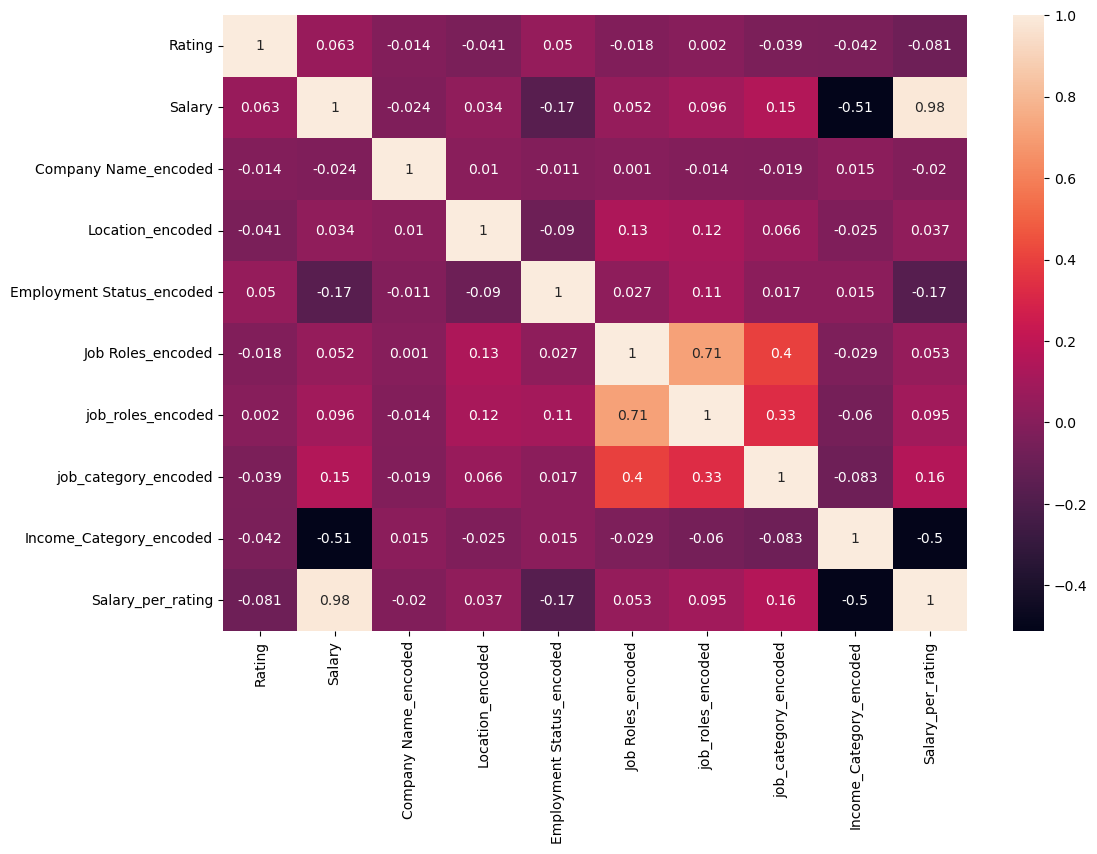

In [895]:
plt.figure(figsize=(12,8))
sns.heatmap(corr1,annot=True)
plt.show()

In [897]:
df_cleaned.head(2)

,Rating,Company Name,Salary,Location,Employment Status,Job Roles,job_roles,job_category,Income_Category,Salary_per_rating,Company Name_encoded,Location_encoded,Employment Status_encoded,Job Roles_encoded,job_roles_encoded,job_category_encoded,Income_Category_encoded
0,3.8,Sasken,400000,South,Full Time,Android,Android Developer,Developer,Medium,105263,8129,1,1,0,9,0,2
1,4.5,Advanced Millennium Technologies,400000,South,Full Time,Android,Android Developer,Developer,Medium,88888,417,1,1,0,9,0,2


In [899]:
x = df_cleaned[['Location_encoded', 'Employment Status_encoded',
    'job_category_encoded','job_roles_encoded',
       'Income_Category_encoded']]
y = df_cleaned['Salary']
x

,Location_encoded,Employment Status_encoded,job_category_encoded,job_roles_encoded,Income_Category_encoded
0,1,1,0,9,2
1,1,1,0,9,2
2,1,1,0,9,0
3,1,1,0,9,1
4,1,1,0,9,2
...,...,...,...,...,...
22765,1,1,0,153,1
22766,1,1,0,153,1
22767,1,1,0,153,1
22768,1,1,0,153,1


In [901]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=24)

In [903]:
cat_cols = x.select_dtypes(include='category').columns.tolist()
cat_cols

[]

In [905]:
preprocessor = ColumnTransformer([('cat',OneHotEncoder(drop='first'),cat_cols)],remainder='passthrough')

In [907]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Support Vector Regression': SVR(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'KNN Regression': KNeighborsRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(),
    'XGBoost Regression': xgb.XGBRegressor()
}

In [909]:
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor',preprocessor),
        ('regressor',model)
    ])
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    results.append({
        'model':name,
        'R2_score':r2_score(y_test,y_pred),
        'MSE': mean_squared_error(y_test,y_pred)
    })

In [910]:
df = pd.DataFrame(results)
df.sort_values(by='R2_score',ascending = False)

,model,R2_score,MSE
6,Random Forest Regression,0.832442,2.737534e+10
8,XGBoost Regression,0.831723,2.749282e+10
4,Decision Tree Regression,0.831262,2.756811e+10
7,AdaBoost Regression,0.811563,3.078640e+10
5,KNN Regression,0.788116,3.461713e+10
1,Ridge Regression,0.308316,1.130060e+11
2,Lasso Regression,0.308314,1.130063e+11
0,Linear Regression,0.308314,1.130064e+11
3,Support Vector Regression,-0.063063,1.736812e+11


In [911]:
new_df = pd.DataFrame({
    'Location_encoded':[1],
    'Employment Status_encoded':[1],
    'job_roles_encoded':[10],
    'job_category_encoded':[0],
    'Income_Category_encoded':[2]
})

In [915]:
df_cleaned.select_dtypes(include='int64')

,Salary,Salary_per_rating,Company Name_encoded,Location_encoded,Employment Status_encoded,Job Roles_encoded,job_roles_encoded,job_category_encoded,Income_Category_encoded
0,400000,105263,8129,1,1,0,9,0,2
1,400000,88888,417,1,1,0,9,0,2
2,1000000,250000,9777,1,1,0,9,0,0
3,300000,78947,8533,1,1,0,9,0,1
4,600000,136363,884,1,1,0,9,0,2
...,...,...,...,...,...,...,...,...,...
22765,200000,42553,3142,1,1,10,153,0,1
22766,300000,75000,6373,1,1,10,153,0,1
22767,192000,46829,3444,1,1,10,153,0,1
22768,300000,73170,313,1,1,10,153,0,1


In [851]:
results = []

for name, model in [('XGBoost Regression', xgb.XGBRegressor())]:
    pipeline = Pipeline([
        ('preprocessor',preprocessor),
        ('regressor',model)
    ])
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(new_df)
    print(f"Predicted Salary: ${y_pred[0]:.2f}")

Predicted Salary: $519503.25


In [852]:
param_grid = {
    'classifier__n_estimators': [100, 150, 200, 250, 300],
    'classifier__max_depth': [None, 6, 10, 20], 
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2], 
    'classifier__subsample': [0.7, 0.8, 1.0], 
    'classifier__colsample_bytree': [0.7, 0.8, 1.0], 
    'classifier__min_child_weight': [1, 3, 5], 
}

rf_pipeline = Pipeline([
    ('classifier', xgb.XGBRegressor(random_state=24))
])

grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    scoring='r2', 
    n_jobs=-1,
    cv=5,
    verbose=3,
)

In [789]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits
[CV 1/5] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=None, classifier__min_child_weight=1, classifier__n_estimators=100, classifier__subsample=0.7;, score=0.621 total time=   0.0s
[CV 5/5] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=None, classifier__min_child_weight=1, classifier__n_estimators=100, classifier__subsample=1.0;, score=0.631 total time=   0.0s
[CV 1/5] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=None, classifier__min_child_weight=1, classifier__n_estimators=150, classifier__subsample=0.7;, score=0.724 total time=   0.1s
[CV 2/5] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=None, classifier__min_child_weight=1, classifier__n_estimators=150, classifier__subsample=0.7;, score=0.726 total time=   0.1s
[CV 3/5] END classifie

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/5] END classifier__colsample_bytree=1.0, classifier__learning_rate=0.05, classifier__max_depth=20, classifier__min_child_weight=3, classifier__n_estimators=300, classifier__subsample=1.0;, score=0.831 total time=   0.3s
[CV 1/5] END classifier__colsample_bytree=1.0, classifier__learning_rate=0.05, classifier__max_depth=20, classifier__min_child_weight=3, classifier__n_estimators=250, classifier__subsample=1.0;, score=0.831 total time=   0.3s
[CV 5/5] END classifier__colsample_bytree=1.0, classifier__learning_rate=0.05, classifier__max_depth=20, classifier__min_child_weight=5, classifier__n_estimators=100, classifier__subsample=0.7;, score=0.836 total time=   0.1s
[CV 3/5] END classifier__colsample_bytree=1.0, classifier__learning_rate=0.05, classifier__max_depth=20, classifier__min_child_weight=5, classifier__n_estimators=100, classifier__subsample=0.8;, score=0.827 total time=   0.1s
[CV 5/5] END classifier__colsample_bytree=1.0, classifier__learning_rate=0.05, classifier__max_d

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     feature_weights=None,
                                                     gamma=None,
                                                     grow_policy=None,
                                                     importance_type=Non...
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.7, 0.8, 1.0],
                         'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'classifier__max_depth': [None, 6, 10, 20],
                         'classifier__min_child_weight': [1, 3, 5],
                         'classifier__n_estimators': [100, 150, 200, 250, 300],
                         'classifier__subsample': [0.7, 0.8, 1.0]},
             scoring='r2', verbose=3)

In [790]:
grid_search.best_params_

{'classifier__colsample_bytree': 0.7,
 'classifier__learning_rate': 0.05,
 'classifier__max_depth': None,
 'classifier__min_child_weight': 5,
 'classifier__n_estimators': 150,
 'classifier__subsample': 0.8}

In [791]:
grid_search.best_score_

0.8326059222221375

In [792]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [793]:
print('R2 score:', r2_score(y_test, y_pred_best))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_best))

R2 score: 0.8342768549919128
Mean Squared Error: 27075531238.63391


In [794]:
# x.columns

In [917]:
sorted_mapping = df_cleaned[['job_roles', 'job_roles_encoded']] \
    .drop_duplicates() \
    .sort_values(by='job_roles_encoded')
for role, encoded in sorted_mapping.values:
    print(f"'{role}' : {encoded},")

'"ORACLE DBA"' : 0,
'Android' : 2,
'Android &amp; Flutter Developer' : 3,
'Android App Developer' : 4,
'Android App Development' : 5,
'Android Applications Developer' : 6,
'Android Applications Develpoers' : 7,
'Android Architect' : 8,
'Android Developer' : 9,
'Android Developer/Software Engineer' : 10,
'Android Development' : 11,
'Android Engineer' : 12,
'Android Framework Developer' : 13,
'Android Framework Engineer' : 14,
'Android Ionic Developer' : 15,
'Android Mobile Developer' : 16,
'Android Programmer' : 17,
'Android Software Developer' : 18,
'Android Software Engineer' : 19,
'Android Test Engineer' : 20,
'Android Testing' : 21,
'Android and Flutter Developer' : 23,
'Android/IOS Developer' : 24,
'Angular Front End Developer' : 25,
'Apple Ios Development' : 26,
'Applications Database Administrator' : 27,
'Associate Android Developer' : 28,
'Associate Android Engineer' : 29,
'Associate Database Administrator' : 30,
'Associate Database Engineer' : 31,
'Associate Front End Developer

In [861]:
# def predict_salary(location, employment_status, job_role, job_category, income_category):
#     location_map = {'North': 0, 'South': 1}
#     employment_status_map = {'Contractor': 0, 'Full Time': 1, 'Intern': 2}
#     job_roles_map = {0 : '"ORACLE DBA"',
# 2 : 'Android',
# 3 : 'Android &amp; Flutter Developer',
# 4 : 'Android App Developer',
# 5 : 'Android App Development',
# 6 : 'Android Applications Developer',
# 7 : 'Android Applications Develpoers',
# 8 : 'Android Architect',
# 9 : 'Android Develoiper',
# 10 : 'Android Developer',
# 11 : 'Android Developer/Software Engineer',
# 12 : 'Android Development',
# 13 : 'Android Dvelopere',
# 14 : 'Android Engineer',
# 15 : 'Android Framework Developer',
# 16 : 'Android Framework Engineer',
# 17 : 'Android Ionic Developer',
# 18 : 'Android Mobile Developer',
# 19 : 'Android Programmer',
# 20 : 'Android Software Developer',
# 21 : 'Android Software Engineer',
# 22 : 'Android Test Engineer',
# 23 : 'Android Testing',
# 24 : 'Android Trainee',
# 25 : 'Android and Flutter Developer',
# 26 : 'Android/IOS Developer',
# 27 : 'Angular Front End Developer',
# 28 : 'Apple Ios Development',
# 29 : 'Applications Database Administrator',
# 30 : 'Associate Android Developer',
# 31 : 'Associate Android Engineer',
# 32 : 'Associate Database Administrator',
# 33 : 'Associate Database Engineer',
# 34 : 'Associate Front End Developer',
# 35 : 'Associate Front End Engineer',
# 36 : 'Associate IOS Developer',
# 37 : 'Associate Java Developer',
# 38 : 'Associate Oracle Database Administrator',
# 39 : 'Backend',
# 40 : 'Backend Associate',
# 41 : 'Backend Developer',
# 42 : 'Backend Engineer',
# 43 : 'Backend Engineering',
# 44 : 'Backend Executive',
# 45 : 'Backend Executive & Supporting Staff',
# 46 : 'Backend Java Developer',
# 47 : 'Backend Operation',
# 48 : 'Backend Operations',
# 49 : 'Backend Process',
# 50 : 'Backend Software Developer',
# 51 : 'Backend Software Engineer',
# 52 : 'Backend Support',
# 53 : 'Backend Support Executive',
# 54 : 'Backend Web Developer',
# 55 : 'Chargeback Backend',
# 56 : 'Cloud Database Engineer',
# 57 : 'Core Java Developer',
# 58 : 'Csa Front End',
# 59 : 'DB Administrator',
# 60 : 'DB2 Database Administrator',
# 61 : 'Database Administration',
# 62 : 'Database Administrative',
# 63 : 'Database Administrator',
# 64 : 'Database Administrator (DBA)',
# 65 : 'Database Administrator (DBA) Oracle',
# 66 : 'Database Administrator (Database Administrator)',
# 67 : 'Database Administrator (Database Administrator) Oracle',
# 68 : 'Database Administrator Advisor',
# 69 : 'Database Administrator Associate',
# 70 : 'Database Administrator Consultant',
# 71 : 'Database Administrator Developer',
# 72 : 'Database Administrator II',
# 73 : 'Database Administrator Specialist',
# 74 : 'Database Administrator/Developer',
# 75 : 'Database Administrators',
# 76 : 'Database Analyst',
# 77 : 'Database Architect',
# 78 : 'Database Architect/Developer',
# 79 : 'Database Consultant',
# 80 : 'Database Designer',
# 81 : 'Database Developer',
# 82 : 'Database Engineer',
# 83 : 'Database Programmer',
# 84 : 'Database Software Engineer',
# 85 : 'Database Specialist',
# 86 : 'Entry Level Java Developer',
# 87 : 'Flutter/Android Developer',
# 88 : 'Freelance Android Mobile Developer',
# 89 : 'Fresher Front End',
# 90 : 'Freshers Java Applications Developer',
# 91 : 'Front End',
# 92 : 'Front End Architect',
# 93 : 'Front End Assistant',
# 94 : 'Front End Associate',
# 95 : 'Front End Cashier',
# 96 : 'Front End Chasier',
# 97 : 'Front End Designer',
# 98 : 'Front End Dev',
# 99 : 'Front End Developer',
# 100 : 'Front End Developer (Angular)',
# 101 : 'Front End Developer (React JS)',
# 102 : 'Front End Developer and Designer',
# 103 : 'Front End Developer, UI Designer, UI Developer, User Experience Designer, HTML5 Developer',
# 104 : 'Front End Development',
# 105 : 'Front End Engineer',
# 106 : 'Front End Engineer III',
# 107 : 'Front End Eveloper',
# 108 : 'Front End React Developer',
# 109 : 'Front End Service Clerk/Cashier',
# 110 : 'Front End Software Engineer',
# 111 : 'Front End Team Leader',
# 112 : 'Front End UI Developer',
# 113 : 'Front End Web Deceloper',
# 114 : 'Front End Web Developer',
# 115 : 'Front End Web Developer/Designer',
# 116 : 'Front End Web Development',
# 117 : 'Full Stack Android Developer',
# 118 : 'Full Stack Front End Developer',
# 119 : 'Full Stack Java Developer',
# 120 : 'Game Developer ( Android, Windows)',
# 121 : 'IOS & Android Developer',
# 122 : 'IOS App Review WWDR',
# 123 : 'IOS Applications Developer',
# 125 : 'IOS Developee',
# 126 : 'IOS Developeer',
# 127 : 'IOS Developer',
# 128 : 'IOS Developer L2',
# 129 : 'IOS Developers',
# 130 : 'IOS Development',
# 131 : 'IOS Engineer',
# 132 : 'IOS Software Developer',
# 133 : 'Ios App Developer',
# 134 : 'Ios Mobile Developer',
# 135 : 'Ios Software Engineer',
# 136 : 'Java',
# 137 : 'Java Applications Developer',
# 138 : 'Java Architect',
# 139 : 'Java Backend Developer',
# 140 : 'Java Backend Developer ()',
# 141 : 'Java Backend Web Developer',
# 142 : 'Java Consultant',
# 143 : 'Java Delevoper',
# 144 : 'Java Developeer',
# 145 : 'Java Developer',
# 146 : 'Java Developer Associate',
# 147 : 'Java Developer Fresher',
# 148 : 'Java Developer(Fresher)',
# 149 : 'Java Developer(Java Microservice Developer)',
# 150 : 'Java Developing',
# 151 : 'Java Devlopers',
# 152 : 'Java Engineer',
# 153 : 'Java Fresher',
# 154 : 'Java Full Stack Developer',
# 155 : 'Java Fullstack Developer',
# 156 : 'Java J2EE Developer',
# 157 : 'Java Jee Developer',
# 158 : 'Java Production Support',
# 159 : 'Java Programmer',
# 160 : 'Java Programmer Analyst',
# 161 : 'Java SSE',
# 162 : 'Java Script Developer',
# 163 : 'Java Software Developer',
# 164 : 'Java Software Engineer',
# 165 : 'Java Spring Boot Developer',
# 166 : 'Java Team Leader',
# 168 : 'Java Trainer',
# 169 : 'Java Web Developer',
# 170 : 'Java With Spring Boot Developer',
# 171 : 'Java/J2EE Developer',
# 172 : 'Jr Backend Developer',
# 173 : 'Jr iOS developer',
# 174 : 'Jr. iOS Developer',
# 175 : 'Magento II Backend Developer',
# 176 : 'Mainframe DB2 Database Administrator',
# 177 : 'Microsoft SQL Server Database Administrator',
# 178 : 'Middle IOS Developer',
# 179 : 'Mobile Developer (IOS)',
# 180 : 'MongoDB Database Administrator',
# 181 : 'Ms SQL Server Database Administrator',
# 182 : 'Mssql Database Administrator',
# 183 : 'Mysql Database Administrator',
# 184 : 'Node Js Backend Developer',
# 185 : 'NodeJS Backend Developer',
# 186 : 'Operations Backend',
# 187 : 'Oracle Applications Database Administrator',
# 188 : 'Oracle Applications Database Administrator (Database Administrator)',
# 189 : 'Oracle Database Administrator',
# 190 : 'Oracle Database Administrator/Developer',
# 191 : 'Oracle Database Developer',
# 192 : 'Other',
# 193 : 'Peoplesoft Database Administrator',
# 194 : 'PostgreSQL Database Administrator',
# 195 : 'Product Developer(IOS)',
# 196 : 'Professional Front End Developer',
# 197 : 'Python Backend Developer',
# 198 : 'React Front End Developer',
# 199 : 'React Js Front End Developer',
# 200 : 'SAP Database Administrator',
# 202 : 'SQL Database Administrator',
# 203 : 'SQL Database Developer',
# 204 : 'SQL Server DBA',
# 205 : 'SQL Server Database Administrator',
# 206 : 'SR. IOS Applications DEVELOPER',
# 207 : 'Sen Ios Developer',
# 208 : 'Software Backend Developer',
# 209 : 'Software Developer (Android)',
# 210 : 'Software Developer (Backend Engineer)',
# 211 : 'Software Developer (Backend Node Js)',
# 212 : 'Software Developer (Backend)',
# 213 : 'Software Developer (IOS Developer)',
# 215 : 'Software Engineer (Android Developer)',
# 216 : 'Software Engineer (Backend)',
# 217 : 'Software Engineer (IOS)',
# 218 : 'Software Engineer (Ios Developer)',
# 219 : 'Software Engineer Android',
# 220 : 'Software Engineer Java',
# 221 : 'Software Engineer(Android)',
# 222 : 'Software Engineer(IOS Developer)',
# 223 : 'Software Engineer, Backend',
# 225 : 'Sr Android developer',
# 226 : 'Sr Backend Software Engineer',
# 227 : 'Sr Database Administrator',
# 228 : 'Sr iOS Developer',
# 229 : 'Sr. Android Developer',
# 230 : 'Sr. Database Administrator',
# 231 : 'Sr. Database Engineer',
# 232 : 'Sr. Front End Developer',
# 233 : 'Sr. IOS Engineer',
# 234 : 'Sr. Java/J2EE Developer',
# 235 : 'Sr. iOS Developer',
# 236 : 'Sybase Database Administrator',
# 237 : 'Total Exp: IV III In IOS',
# 238 : 'UI Developer/Front End Developer',
# 239 : 'UI Front End Developer',
# 240 : 'UI/Front End Developer',
# 241 : 'UI/UX Designer & Front End Developer',
#     242 : 'UI/User Experience Designer & Front End Developer',}
#     job_category_map = {'Developer': 0, 'Engineer': 1, 'Other': 2, 'Programmer': 3}
#     income_category_map = {'High': 0, 'Low': 1, 'Medium': 2}



#     job_role_index = next((key for key, value in job_roles_map.items() if value == job_role), None)
#     if job_role_index is None:
#         return "Error: Invalid job role selected."
    
#     input_data = pd.DataFrame({
#         'location': [location_map[location]],
#         'employment_status': [employment_status_map[employment_status]],
#         'job_role': [job_role_index],
#         'job_category': [job_category_map[job_category]],
#         'income_category': [income_category_map[income_category]],
#     })
    
#     prediction = model.predict(input_data)
#     return f"Predicted salary: {int(prediction[0])} units"

# # Define the Gradio interface
# with gr.Blocks(title='Salary Prediction Demo') as demo:
#     gr.Markdown('Salary Prediction Based on Job and Location Factors')

#     with gr.Row():
#         with gr.Column():
#             location = gr.Radio(choices=['North', 'South'], label='Location')
#             employment_status = gr.Radio(choices=['Contractor', 'Full Time', 'Intern'], label='Employment Status')
#             job_role = gr.Dropdown(choices=list(job_roles_map.values()), label='Job Role')
#             job_category = gr.Radio(choices=['Developer', 'Engineer', 'Other', 'Programmer'], label='Job Category')
#             income_category = gr.Radio(choices=['High', 'Low', 'Medium'], label='Income Category')
            
#             predict_button = gr.Button('Predict Salary')
#             prediction_output = gr.Textbox(label='Predicted Salary', value='Click predict to see the result')

#     # Link function to button
#     predict_button.click(
#         fn=predict_salary,
#         inputs=[location, employment_status, job_role, job_category, income_category],
#         outputs=prediction_output
#     )

# # Launch
# if __name__ == '__main__':
#     demo.launch(share=True)

In [921]:
model.fit(X_train, y_train)
joblib.dump(X_train.columns.tolist(), 'salary_predict.joblib')
columns = joblib.load('salary_predict.joblib')

location_map = {'North': 0, 'South': 1}
employment_status_map = {'Contractor': 0, 'Full Time': 1, 'Intern': 2}
job_category_map = {'Developer': 0, 'Engineer': 1, 'Other': 2, 'Programmer': 3}
income_category_map = {'High': 0, 'Medium': 2, 'Low': 1}
job_roles_map = {
'ORACLE DBA' : 0,
'Android' : 2,
'Android &amp; Flutter Developer' : 3,
'Android App Developer' : 4,
'Android App Development' : 5,
'Android Applications Developer' : 6,
'Android Applications Develpoers' : 7,
'Android Architect' : 8,
'Android Developer' : 9,
'Android Developer/Software Engineer' : 10,
'Android Development' : 11,
'Android Engineer' : 12,
'Android Framework Developer' : 13,
'Android Framework Engineer' : 14,
'Android Ionic Developer' : 15,
'Android Mobile Developer' : 16,
'Android Programmer' : 17,
'Android Software Developer' : 18,
'Android Software Engineer' : 19,
'Android Test Engineer' : 20,
'Android Testing' : 21,
'Android and Flutter Developer' : 23,
'Android/IOS Developer' : 24,
'Angular Front End Developer' : 25,
'Apple Ios Development' : 26,
'Applications Database Administrator' : 27,
'Associate Android Developer' : 28,
'Associate Android Engineer' : 29,
'Associate Database Administrator' : 30,
'Associate Database Engineer' : 31,
'Associate Front End Developer' : 32,
'Associate Front End Engineer' : 33,
'Associate Oracle Database Administrator' : 34,
'Backend' : 35,
'Backend Associate' : 36,
'Backend Developer' : 37,
'Backend Engineer' : 38,
'Backend Engineering' : 39,
'Backend Executive' : 40,
'Backend Executive & Supporting Staff' : 41,
'Backend Java Developer' : 42,
'Backend Operation' : 43,
'Backend Operations' : 44,
'Backend Process' : 45,
'Backend Software Developer' : 46,
'Backend Software Engineer' : 47,
'Backend Support' : 48,
'Backend Support Executive' : 49,
'Backend Web Developer' : 50,
'Chargeback Backend' : 51,
'Cloud Database Engineer' : 52,
'Csa Front End' : 53,
'DB Administrator' : 54,
'DB2 Database Administrator' : 55,
'Database Administration' : 56,
'Database Administrative' : 57,
'Database Administrator' : 58,
'Database Administrator (DBA)' : 59,
'Database Administrator (DBA) Oracle' : 60,
'Database Administrator (Database Administrator)' : 61,
'Database Administrator (Database Administrator) Oracle' : 62,
'Database Administrator Advisor' : 63,
'Database Administrator Associate' : 64,
'Database Administrator Consultant' : 65,
'Database Administrator Developer' : 66,
'Database Administrator II' : 67,
'Database Administrator Specialist' : 68,
'Database Administrator/Developer' : 69,
'Database Administrators' : 70,
'Database Analyst' : 71,
'Database Architect' : 72,
'Database Architect/Developer' : 73,
'Database Consultant' : 74,
'Database Designer' : 75,
'Database Developer' : 76,
'Database Engineer' : 77,
'Database Programmer' : 78,
'Database Software Engineer' : 79,
'Database Specialist' : 80,
'Flutter/Android Developer' : 81,
'Freelance Android Mobile Developer' : 82,
'Fresher Front End' : 83,
'Front End' : 84,
'Front End Architect' : 85,
'Front End Assistant' : 86,
'Front End Associate' : 87,
'Front End Cashier' : 88,
'Front End Chasier' : 89,
'Front End Designer' : 90,
'Front End Dev' : 91,
'Front End Developer' : 92,
'Front End Developer (Angular)' : 93,
'Front End Developer (React JS)' : 94,
'Front End Developer and Designer' : 95,
'Front End Developer, UI Designer, UI Developer, User Experience Designer, HTML5 Developer' : 96,
'Front End Development' : 97,
'Front End Engineer' : 98,
'Front End Engineer III' : 99,
'Front End Eveloper' : 100,
'Front End React Developer' : 101,
'Front End Service Clerk/Cashier' : 102,
'Front End Software Engineer' : 103,
'Front End Team Leader' : 104,
'Front End UI Developer' : 105,
'Front End Web Deceloper' : 106,
'Front End Web Developer' : 107,
'Front End Web Developer/Designer' : 108,
'Front End Web Development' : 109,
'Full Stack Android Developer' : 110,
'Full Stack Front End Developer' : 111,
'Full Stack Java Developer' : 112,
'Game Developer ( Android, Windows)' : 113,
'IOS App Review WWDR' : 114,
'Java Backend Developer' : 116,
'Java Backend Developer ()' : 117,
'Java Backend Web Developer' : 118,
'Java Consultant' : 119,
'Java Developeer' : 120,
'Java Developer' : 121,
'Java Developing' : 122,
'Java Engineer' : 123,
'Java Full Stack Developer' : 124,
'Java J2EE Developer' : 125,
'Java Programmer' : 126,
'Java Script Developer' : 127,
'Java Senior Developer' : 128,
'Java Software Developer' : 129,
'Java Software Engineer' : 130,
'Java Technical Lead' : 131,
'Java Web Developer' : 132,
'Jr Backend Developer' : 133,
'Jr iOS developer' : 134,
'Jr. iOS Developer' : 135,
'Junior Java Developer' : 136,
'Magento II Backend Developer' : 137,
'Mainframe DB2 Database Administrator' : 138,
'Microsoft SQL Server Database Administrator' : 139,
'Mobile Developer (IOS)' : 140,
'MongoDB Database Administrator' : 141,
'Ms SQL Server Database Administrator' : 142,
'Mssql Database Administrator' : 143,
'Mysql Database Administrator' : 144,
'Node Js Backend Developer' : 145,
'NodeJS Backend Developer' : 146,
'Operations Backend' : 147,
'Oracle Applications Database Administrator' : 148,
'Oracle Applications Database Administrator (Database Administrator)' : 149,
'Oracle Database Administrator' : 150,
'Oracle Database Administrator/Developer' : 151,
'Oracle Database Developer' : 152,
'Other' : 153,
'Peoplesoft Database Administrator' : 154,
'PostgreSQL Database Administrator' : 155,
'Product Developer(IOS)' : 156,
'Professional Front End Developer' : 157,
'Python Backend Developer' : 158,
'React Front End Developer' : 159,
'React Js Front End Developer' : 160,
'SAP Database Administrator' : 161,
'SQL Database Administrator' : 163,
'SQL Database Developer' : 164,
'SQL Server DBA' : 165,
'SQL Server Database Administrator' : 166,
'SR. IOS Applications DEVELOPER' : 167,
'Sen Ios Developer' : 168,
'Senior Java Developer' : 169,
'Software Backend Developer' : 170,
'Software Developer (Android)' : 171,
'Software Developer (Backend Engineer)' : 172,
'Software Developer (Backend Node Js)' : 173,
'Software Developer (Backend)' : 174,
'Software Engineer (Android Developer)' : 176,
'Software Engineer (Backend)' : 177,
'Software Engineer (IOS)' : 178,
'Software Engineer Android' : 179,
'Software Engineer Java' : 180,
'Software Engineer(Android)' : 181,
'Sr Android developer' : 183,
'Sr Backend Software Engineer' : 184,
'Sr Database Administrator' : 185,
'Sr iOS Developer' : 186,
'Sr. Android Developer' : 187,
'Sr. Database Administrator' : 188,
'Sr. Database Engineer' : 189,
'Sr. Front End Developer' : 190,
'Sr. IOS Engineer' : 191,
'Sr. iOS Developer' : 192,
'Sybase Database Administrator' : 193,
'Total Exp: IV III In IOS' : 194,
'UI Developer/Front End Developer' : 195,
'UI Front End Developer' : 196,
'UI/Front End Developer' : 197,
'UI/UX Designer & Front End Developer' : 198,
'UI/User Experience Designer & Front End Developer' : 199,
}


def predict_salary(location, employment_status, job_role, job_category, income_category):
    try:

        job_role_index = job_roles_map.get(job_role, job_roles_map['Other'])

  
        row = [
            location_map[location],
            employment_status_map[employment_status],
            job_role_index,
            job_category_map[job_category],
            income_category_map[income_category]
        ]

        input_data = pd.DataFrame([row],columns=columns)


        prediction = model.predict(input_data)
        # Assuming prediction[0] is in INR
        yearly_income_inr = int(prediction[0])
        monthly_income_inr = yearly_income_inr // 12

        # Currency conversion: INR to MYR (example rate: 1 INR = 0.056 MYR)
        conversion_rate = 0.056
        yearly_income_myr = yearly_income_inr * conversion_rate
        monthly_income_myr = yearly_income_myr / 12

        return (
            f"Annual Salary:\n"
            f" - 🇮🇳 ₹{yearly_income_inr:,}\n"
            f" - 🇲🇾 RM{yearly_income_myr:,.2f}\n\n"
            f"Monthly Salary:\n"
            f" - 🇮🇳 ₹{monthly_income_inr:,}\n"
            f" - 🇲🇾 RM{monthly_income_myr:,.2f}"
)
    
    
    except Exception as e:
        return f"Error: {e}"


def build_interface():
    with gr.Blocks() as demo:
        gr.Markdown("India Salary Prediction")

        with gr.Row():
            with gr.Column():
                loc_input = gr.Radio(['North', 'South'], label="Location")
                emp_status_input = gr.Radio(['Contractor', 'Full Time', 'Intern'], label="Employment Status")
                job_role_input = gr.Dropdown(choices=list(job_roles_map.keys()), label="Job Role")
                job_cat_input = gr.Radio(['Developer', 'Engineer', 'Programmer', 'Other'], label="Job Category")
                income_cat_input = gr.Radio(['High', 'Medium', 'Low'], label="Income Category")
                predict_button = gr.Button("Predict Salary")
                result_output = gr.Textbox(label="Predicted Salary")

        predict_button.click(
            fn=predict_salary,
            inputs=[loc_input, emp_status_input, job_role_input, job_cat_input, income_cat_input],
            outputs=result_output
        )
    return demo

demo = build_interface()P

if __name__ == "__main__":
    demo.launch()



* Running on local URL:  http://127.0.0.1:7891
* To create a public link, set `share=True` in `launch()`.
